#  electricity consumption forcasting using deeplearning LSTM

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [109]:
df = pd.read_csv(r"C:\Users\Sahito\Downloads\py\AEP_hourly.csv")
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


**Exploring Dataset**

In [74]:

print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")
print(df.tail(5),"\n")
print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

                   Datetime   AEP_MW
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.

**Reformat the Date Time Columns**

In [110]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [76]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



In [111]:
dataset.shape

(121273, 7)

In [78]:
dataset.index.duplicated().sum()

4

**Removing duplicate indexes**

In [79]:
dataset.reset_index(level=0, inplace=True)

In [80]:
dataset.index.duplicated().sum()

0

In [81]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

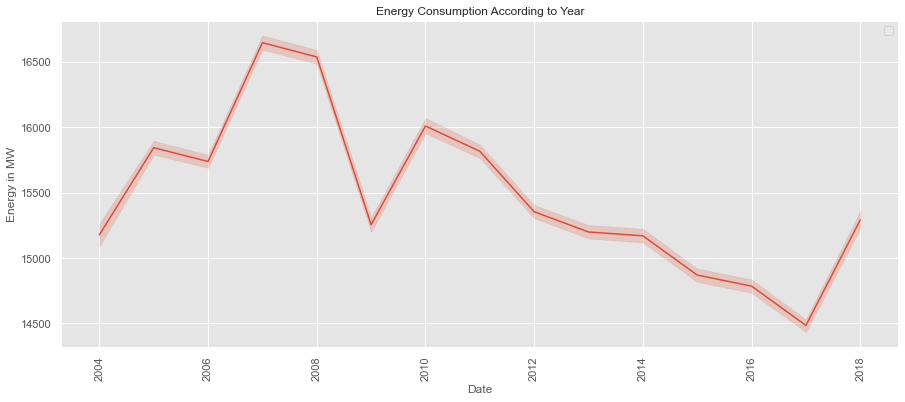

In [84]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')



sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=dataset)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

Text(0.5, 1.0, 'Ennergy Distribution')

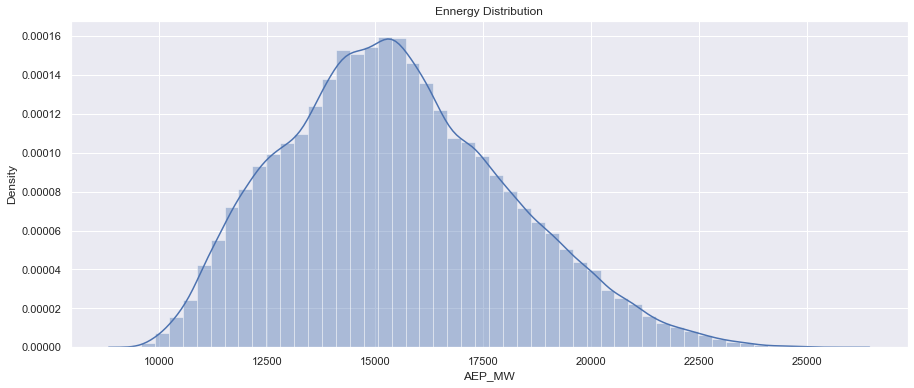

In [85]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

In [ ]:
pd.plotting.register_matplotlib_converters()

**Energy with Respect to Time**

In [86]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"],y=dataset["AEP_MW"], data=dataset)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

**Resampling Data**

In [87]:
dataset.head()

,Datetime,AEP_MW,Month,Year,Date,Time,Week,Day
0,2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
1,2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2,2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
3,2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
4,2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [112]:
NewDataSet = dataset.resample('D').mean()

In [113]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [118]:
TestData = NewDataSet.tail(100)

Training_Set =  NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [119]:
TestData

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0
...,...,...,...,...
2018-07-30,15368.083333,7.0,2018.0,31.0
2018-07-31,15180.291667,7.0,2018.0,31.0
2018-08-01,15151.166667,8.0,2018.0,31.0


In [120]:
Training_Set

,AEP_MW
Datetime,
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333
...,...
2018-05-31,16741.083333
2018-06-01,15734.666667
2018-06-02,14212.166667


In [121]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [126]:
type(Training_Set.values)

numpy.ndarray

In [127]:
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [128]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [129]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

# Model

In [130]:
from keras.models import Sequential

In [131]:
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [132]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [133]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 [==============================] - 25s 86ms/step - loss: 0.0231
Epoch 2/50
155/155 [==============================] - 13s 84ms/step - loss: 0.0186
Epoch 3/50
155/155 [==============================] - 13s 84ms/step - loss: 0.0175
Epoch 4/50
155/155 [==============================] - 13s 84ms/step - loss: 0.0167
Epoch 5/50
155/155 [==============================] - 13s 85ms/step - loss: 0.0160
Epoch 6/50
155/155 [==============================] - 13s 84ms/step - loss: 0.0157
Epoch 7/50
155/155 [==============================] - 13s 86ms/step - loss: 0.0155
Epoch 8/50
155/155 [==============================] - 15s 95ms/step - loss: 0.0149
Epoch 9/50
155/155 [==============================] - 15s 94ms/step - loss: 0.0134
Epoch 10/50
155/155 [==============================] - 14s 89ms/step - loss: 0.0116
Epoch 11/50
155/155 [==============================] - 13s 83ms/step - loss: 0.0098
Epoch 12/50
155/155 [==============================] - 13s 84ms/step - loss: 0.0091
E

# Test Data

In [134]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0


In [135]:
TestData.shape

(100, 4)

In [136]:
NewDataSet.shape

(5055, 4)

In [137]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [138]:
Df_Total.shape

(5155, 1)

In [139]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [140]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_values = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_values = sc.inverse_transform(predicted_values)

4/4 [==============================] - 2s 34ms/step


In [141]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_values
dates = TestData.index.to_list()

In [142]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

# Future Predicted values

In [144]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13558.653320
1,2018-04-27,12964.000000,13031.032227
2,2018-04-28,12237.583333,14678.493164
3,2018-04-29,12156.791667,13236.008789
4,2018-04-30,13443.500000,12807.364258
...,...,...,...
95,2018-07-30,15368.083333,15364.002930
96,2018-07-31,15180.291667,15610.849609
97,2018-08-01,15151.166667,15219.843750
98,2018-08-02,15687.666667,15426.262695


In [145]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


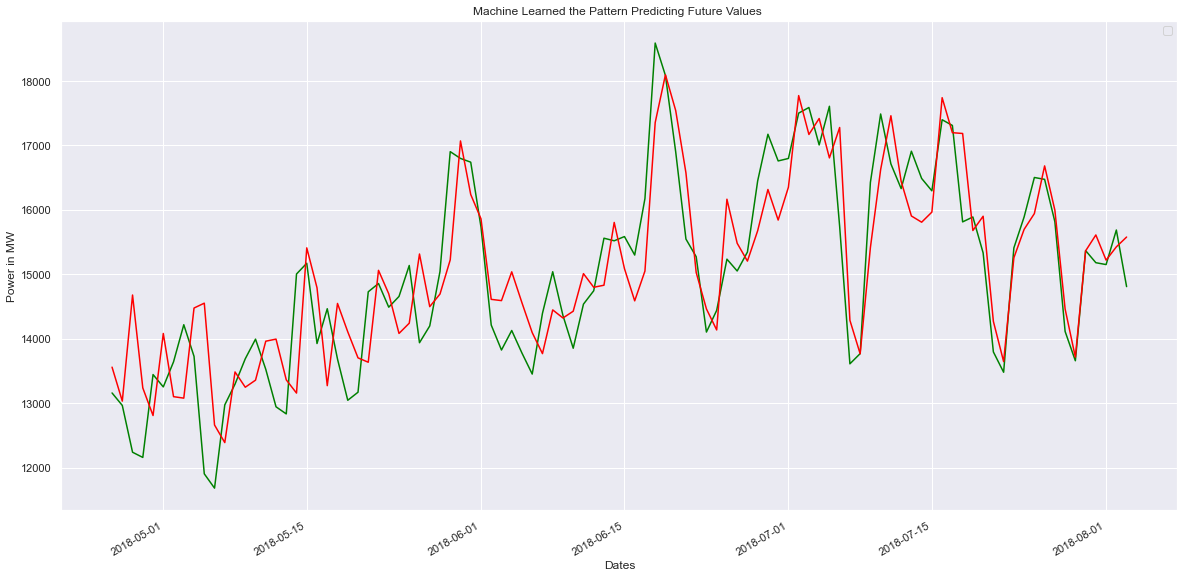

In [150]:
fig = plt.figure(figsize=(20,10))

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

**Here red-line is the one that Machine Learning model predicted, green-line is the actual value. Machine predicted almost accurately using LSTM model**